In [1]:
import pandas as pd # Библиотека Pandas для работы с табличными данными
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import matplotlib.pyplot as plt # библиотека Matplotlib для визуализации
import seaborn as sns # библиотека seaborn для визуализации
import numpy as np # библиотека Numpy для операций линейной алгебры и прочего
import plotly.graph_objects as go # Библиотека Plotly. Модуль "Graph Objects"
import plotly.express as px # Библиотека Plotly. Модуль "Express"

# предварительная обработка числовых признаков
from sklearn.preprocessing import MinMaxScaler# Импортируем нормализацию от scikit-learn
from sklearn.preprocessing import StandardScaler # Импортируем стандартизацию от scikit-learn
from sklearn.preprocessing import PowerTransformer  # Степенное преобразование от scikit-learn
# предварительная обработка категориальных признаков
from sklearn.preprocessing import OneHotEncoder# Импортируем One-Hot Encoding от scikit-learn
from sklearn.preprocessing import OrdinalEncoder# Импортируем Порядковое кодированиеот scikit-learn

from sklearn.pipeline import Pipeline # Pipeline.Не добавить, не убавить

from sklearn.compose import ColumnTransformer # т.н. преобразователь колонок

from sklearn.base import BaseEstimator, TransformerMixin # для создания собственных преобразователей / трансформеров данных

import warnings
warnings.filterwarnings('ignore')

Набор данных представляет собой данные о продаже автомобилей в России по регионам.

Набор включает ряд категориальных и численных значений, составляющих одну запись (строку). Число записей можно найти как число строк.

Каждый столбец в записи — это отдельный параметр.

Среди указанных параметров приведены целевой для задачи предсказания (регрессии) - цена автомобиля.

Также среди параметров есть целевой для задачи классификации - мощность двигателя.




Загружаем наши данные из файла

In [6]:
DF = pd.read_csv('/content/all_regions.csv', engine='python')
DF

,brand,name,bodyType,color,fuelType,year,mileage,transmission,power,price,vehicleConfiguration,engineName,engineDisplacement,date,location,link,description,parse_date
0,Volkswagen,Golf,Хэтчбек 5 дв.,Серебристый,Бензин,NaN,240000.0,Механика,101.0,280000,NaN,NaN,NaN,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/volkswagen/golf/5001300...,101 л.с. люк не течёт. Документы в порядке. Со...,2023-05-02 01:00:00
1,Лада,1111 Ока,Хэтчбек 3 дв.,Фиолетовый,Бензин,1996.0,37000.0,Механика,33.0,95000,0.6 MT 11113,ВАЗ-11113,0.7 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/oka/50378140.html,"Ваз Ока Год: 2003 Цвет: Баклажан, в ПТС так и ...",2023-05-02 20:00:00
2,Toyota,Funcargo,Хэтчбек 5 дв.,Серебристый,Бензин,2002.0,295000.0,АКПП,87.0,380000,1.3 J,2NZ-FE,1.3 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/toyota/funcargo/5037751...,ХОРОШЕЕ СОСТОЯНИЕ. замена комплекта грм и помп...,2023-05-02 20:00:00
3,Лада,Гранта,Лифтбек,Серый,Бензин,2018.0,16000.0,Механика,106.0,795000,1.6 MT Comfort,ВАЗ-21127,1.6 LTR,2023-04-02 00:00:00,Майкоп,https://maykop.drom.ru/lada/granta/50382492.html,"Автомобиль в отличном техническом состоянии, н...",2023-05-02 23:00:00
4,Лада,Нива Легенд,Джип 3 дв.,Зеленый,Бензин,NaN,NaN,Механика,83.0,1022900,NaN,NaN,NaN,2023-04-02 00:00:00,Яблоновский,https://yablonovskiy.drom.ru/lada/niva_legend/...,Модель: Нива Легенд Комплектация: LADA (ВАЗ) N...,2023-05-02 20:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17723,Toyota,Vista,Седан,Белый,Бензин,NaN,250000.0,АКПП,136.0,430000,NaN,NaN,NaN,2023-05-24 00:00:00,Чита,https://chita.drom.ru/toyota/vista/46477226.html,"Авто норм,состояние сел поехал, двигатель конт...",2023-05-25 10:00:00
17724,УАЗ,Буханка,Минивэн,Зеленый,Бензин,NaN,10000.0,Механика,70.0,200000,NaN,NaN,NaN,2023-05-24 00:00:00,Дарасун,https://darasun.drom.ru/uaz/buhanka/51039332.html,Находится пгт Дарасун,2023-05-25 10:00:00
17725,Mitsubishi,Delica,Минивэн,Белый,Бензин,2000.0,242000.0,АКПП,145.0,740000,2.4 exceed 8 high roof long,4G64,2.4 LTR,2023-05-24 00:00:00,Чита,https://chita.drom.ru/mitsubishi/delica/509332...,ХОРОШИЙ АВТОБУС И В ПРЕДСТАВЛЕНИЕ НЕ НЕ НУЖДАЕ...,2023-05-25 10:00:00
17726,Toyota,Vitz,Хэтчбек 5 дв.,Синий,Бензин,2005.0,256000.0,Вариатор,71.0,420000,1.0 B,1KR-FE,1.0 LTR,2023-05-24 00:00:00,Чита,https://chita.drom.ru/toyota/vitz/48596215.html,СРОЧНО.Продам витца расход радует 5-6 л на сот...,2023-05-25 10:00:00


In [191]:
DF.columns

Index(['brand', 'name', 'bodyType', 'color', 'fuelType', 'year', 'mileage',
       'transmission', 'power', 'price', 'vehicleConfiguration', 'engineName',
       'engineDisplacement', 'date', 'location', 'link', 'description',
       'parse_date'],
      dtype='object')

**Предварительная обработка данных**

выберем нужные колонки

In [192]:
df_new = DF[['brand', 'name', 'bodyType', 'fuelType', 'transmission', 'power', 'year', 'mileage', 'price']]
df_new

,brand,name,bodyType,fuelType,transmission,power,year,mileage,price
0,Volkswagen,Golf,Хэтчбек 5 дв.,Бензин,Механика,101.0,NaN,240000.0,280000
1,Лада,1111 Ока,Хэтчбек 3 дв.,Бензин,Механика,33.0,1996.0,37000.0,95000
2,Toyota,Funcargo,Хэтчбек 5 дв.,Бензин,АКПП,87.0,2002.0,295000.0,380000
3,Лада,Гранта,Лифтбек,Бензин,Механика,106.0,2018.0,16000.0,795000
4,Лада,Нива Легенд,Джип 3 дв.,Бензин,Механика,83.0,NaN,NaN,1022900
...,...,...,...,...,...,...,...,...,...
17723,Toyota,Vista,Седан,Бензин,АКПП,136.0,NaN,250000.0,430000
17724,УАЗ,Буханка,Минивэн,Бензин,Механика,70.0,NaN,10000.0,200000
17725,Mitsubishi,Delica,Минивэн,Бензин,АКПП,145.0,2000.0,242000.0,740000
17726,Toyota,Vitz,Хэтчбек 5 дв.,Бензин,Вариатор,71.0,2005.0,256000.0,420000


Список числовых и категориальных данных

In [193]:
cat_columns = []
num_columns = []

for column_name in df_new.columns:
    if (df_new[column_name].dtypes == object):
        cat_columns +=[column_name]
    else:
        num_columns +=[column_name]

print('categorical columns:\t ',cat_columns, '\n len = ',len(cat_columns))

print('numerical columns:\t ',  num_columns, '\n len = ',len(num_columns))

categorical columns:	  ['brand', 'name', 'bodyType', 'fuelType', 'transmission'] 
 len =  5
numerical columns:	  ['power', 'year', 'mileage', 'price'] 
 len =  4


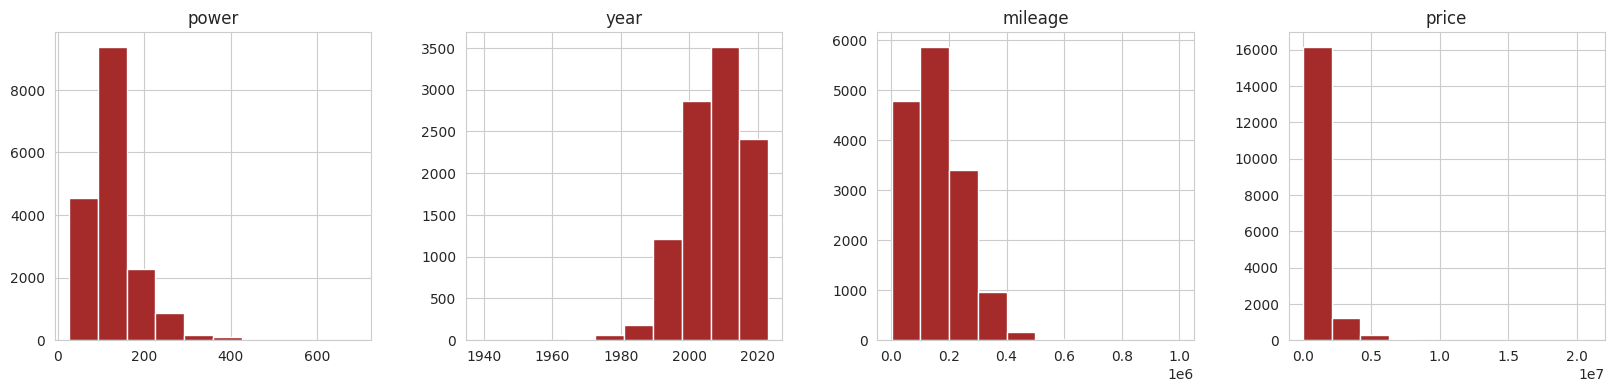

In [194]:
fig, axs = plt.subplots(1,4,figsize=(20,  4))
df_new.hist(column = num_columns, ax = axs, color='brown');

Посмотрим сколько незаполненных значений

In [195]:
df_new.isnull().sum()

brand              0
name               0
bodyType           0
fuelType          54
transmission      61
power            324
year            7458
mileage         2480
price              0
dtype: int64

Видим, что не заполненно много значений в колонке year,mileage и power. Заполним их средними значениями

In [196]:
df_new['year'].fillna(df_new['year'].mean(), inplace = True)
df_new['mileage'].fillna(df_new['mileage'].mean(), inplace = True)
df_new['power'].fillna(df_new['power'].mean(), inplace = True)


In [197]:
df_new['fuelType'].value_counts()

Бензин     16562
Дизель      1047
Электро       65
Name: fuelType, dtype: int64

видим, что самый популярный вид топлива - это бензин. Заполним недостающие значения "Бензин".

In [198]:
df_new['fuelType'].replace(np.nan, 'Бензин', inplace = True)
df_new['fuelType'].describe()

count      17728
unique         3
top       Бензин
freq       16616
Name: fuelType, dtype: object

In [199]:
df_new['transmission'].value_counts()

АКПП        6666
Вариатор    5277
Механика    4533
Робот        641
Автомат      550
Name: transmission, dtype: int64

видим что нет преобладающих значений, а незаполненных полей мало. Думаю, что можно просто удалить незаполненные

In [200]:
df_new = df_new.dropna(subset=['transmission'])
df_new = df_new.reset_index(drop=True)

In [201]:
df_new.isnull().sum()

brand           0
name            0
bodyType        0
fuelType        0
transmission    0
power           0
year            0
mileage         0
price           0
dtype: int64

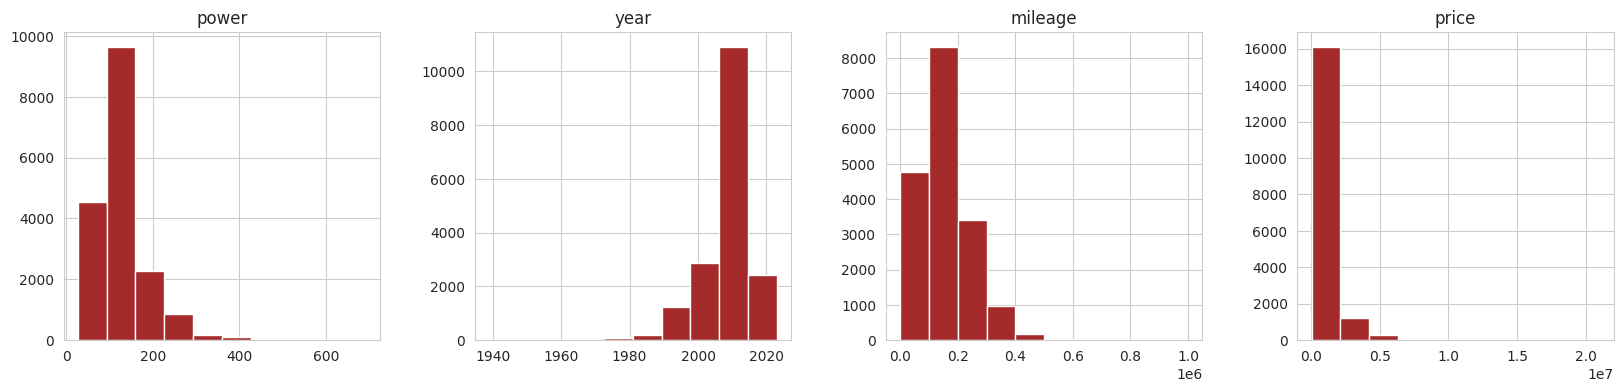

In [202]:
fig, axs = plt.subplots(1,4,figsize=(20,  4))

df_new.hist(column = num_columns, ax = axs, color='brown');

Price убираем из обработки, поскольку она является целевой меткой и будет обработана отдельно

Остальные колонки лучше нелинейно преобразовывать

**PipeLine**

In [203]:
class QuantileReplacer(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05):
        self.threshold = threshold
        self.quantiles = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include='number'):
            low_quantile = X[col].quantile(self.threshold)
            high_quantile = X[col].quantile(1 - self.threshold)
            self.quantiles[col] = (low_quantile, high_quantile)
        return self

    def transform(self, X):
        X_copy = X.copy()
        for col in X.select_dtypes(include='number'):
            low_quantile, high_quantile = self.quantiles[col]
            rare_mask = ((X[col] < low_quantile) | (X[col] > high_quantile))
            if rare_mask.any():
                rare_values = X_copy.loc[rare_mask, col]
                replace_value = np.mean([low_quantile, high_quantile])
                if rare_values.mean() > replace_value:
                    X_copy.loc[rare_mask, col] = high_quantile
                else:
                    X_copy.loc[rare_mask, col] = low_quantile
        return X_copy

In [204]:
class RareGrouper(BaseEstimator, TransformerMixin):
    def __init__(self, threshold=0.05, other_value='Other'):
        self.threshold = threshold
        self.other_value = other_value
        self.freq_dict = {}

    def fit(self, X, y=None):
        for col in X.select_dtypes(include=['object']):
            freq = X[col].value_counts(normalize=True)
            self.freq_dict[col] = freq[freq >= self.threshold].index.tolist()
        return self

    def transform(self, X, y=None):
        X_copy = X.copy()
        for col in X.select_dtypes(include=['object']):
            X_copy[col] = X_copy[col].apply(lambda x: x if x in self.freq_dict[col] else self.other_value)
        return X_copy

In [205]:
num_pipe_year_power = Pipeline([
    ('power', PowerTransformer())
])

num_pipe = ['year','power','mileage']

cat_pipe_style_fuel = Pipeline([
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))

])

cat_style_fuel = ['bodyType', 'fuelType']

cat_pipe_brand = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat_brand = ['brand']

cat_pipe_name = Pipeline([
    ('replace_rare', RareGrouper(threshold=0.0001, other_value='Other')),
    ('encoder', OneHotEncoder(drop='if_binary', handle_unknown='ignore', sparse_output=False))
])

cat_name = ['name']

# Сделаем отдельно Pipeline с числовыми признаками
preprocessors_num = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe_year_power, num_pipe)
])

# и Pipeline со всеми признаками
preprocessors_all = ColumnTransformer(transformers=[
    ('num_pipe', num_pipe_year_power, num_pipe),
    ('cat_style_fuel', cat_pipe_style_fuel, cat_style_fuel),
    ('cat_brand', cat_pipe_brand, cat_brand),
    ('cat_name', cat_pipe_name, cat_name),
])

In [206]:
# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns_num = np.hstack([num_pipe])

**Линейная регрессия**

In [207]:
from sklearn.linear_model import SGDRegressor # Линейная регрессия с градиентным спуском от scikit-learn

from sklearn.model_selection import train_test_split#  функция разбиения на тренировочную и тестовую выборку
# в исполнении scikit-learn
from sklearn.model_selection import ShuffleSplit # при кросс-валидации случайно перемешиваем данные
from sklearn.model_selection import cross_validate # функция кросс-валидации от Scikit-learn

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

from sklearn.metrics import PredictionErrorDisplay # Класс визуализации ошибок модели

Считываем данные, разбиваем на тестовую и тренировочную

In [208]:
# не забываем удалить целевую переменную цену из признаков
X,y = df_new.drop(columns = ['price']), df_new['price']

# разбиваем на тестовую и валидационную
X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)
X_train

,brand,name,bodyType,fuelType,transmission,power,year,mileage
7007,Nissan,Bluebird,Седан,Бензин,АКПП,125.0,1998.000000,300000.00000
7073,Honda,Fit Shuttle,Универсал,Бензин,Вариатор,88.0,2007.183544,127000.00000
9389,Toyota,Granvia,Минивэн,Дизель,АКПП,130.0,1995.000000,517000.00000
12962,Audi,A4,Седан,Бензин,Вариатор,160.0,2007.183544,144000.00000
16446,Honda,Fit,Хэтчбек 5 дв.,Бензин,Вариатор,99.0,2007.183544,132000.00000
...,...,...,...,...,...,...,...,...
11284,Toyota,Prius,Лифтбек,Бензин,Вариатор,99.0,2009.000000,231000.00000
11964,Honda,Fit Shuttle,Универсал,Бензин,Вариатор,88.0,2012.000000,230000.00000
5390,Nissan,Liberty,Минивэн,Бензин,Автомат,140.0,2007.183544,193000.00000
860,EXEED,VX,Джип 5 дв.,Бензин,Робот,249.0,2021.000000,162172.28489


**Оценим модель с использованием только числовых данных**

Преобразуем данные

In [209]:
# Сначала обучаем на тренировочных данных
X_train_prep = preprocessors_num.fit_transform(X_train)
# потом на валидационной
X_val_prep = preprocessors_num.transform(X_val)

Обучаем модель

In [210]:
model = SGDRegressor(random_state = 42)

model.fit(X_train_prep, y_train);

Подготовим несколько функций для анализа обученной модели

вытаскивание коэффициентов из модели

In [211]:
def get_coefs (model):
    """Берем веса как атрибуты обученной модели.
    Входные переменные:
    ===========
    model: обученная модель
    """
    B0=model.intercept_[0]
    B=model.coef_
    return B0, B

написание модели

In [212]:
def print_model (B0,B,features_names):
    """Написание уравнения модели.
    Входные переменные:
    ===========
    B0: смещение (независимый коэффициент)
    weights: веса признаков
    features_names: список названий признаков
    """
    line='{:.3f}'.format(B0)
    sign=['+','-']
    for p,(fn,b) in enumerate(zip(features_names,B)):
        line=line+sign[int(0.5*(np.sign(b)-1))]+'{:.2f}*'.format(np.abs(b))+fn

    print('Решение')
    print(line)

визуализации весов в виде столбчатых диаграмм

In [213]:
def vis_weigths(weights,features_names = None, width = 1200, height = 600):
    """Отрисовка весов.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    """
    numbers = np.arange(0,len(weights))                 # создаем массив от 0 до количество весов-1
    if features_names:
        tick_labels = np.hstack(['B0',features_names])
    else:
        tick_labels = ['B'+str(num) for num in numbers] # создаем "названия" весов
    fig = go.Figure()
    fig.add_trace(go.Bar(x=numbers[weights<0], y=weights[weights<0],
                    marker_color='red',
                    name='отрицательные веса'))
    fig.add_trace(go.Bar(x=numbers[weights>=0], y=weights[weights>=0],
                    marker_color='blue',
                    name='положительные веса'
                    ))

    fig.update_layout(
                title="Веса модели",
                width=width,
                height=height,
                template = "plotly_dark",
                xaxis = dict(
                                         tickmode = 'array',
                                         tickvals = numbers,
                                         ticktext = tick_labels,
                                         )
                )

    fig.show()

Напишем уравнение модели

In [214]:
B0, B = get_coefs(model)
features_names = list(columns_num)
print_model(B0,B,features_names)

Решение
977813.143+373889.29*year+467082.60*power-199393.95*mileage


Визуализируем веса в виде столбчатых диаграмм

In [215]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

Оценка метрик

In [216]:
def calculate_metric(model_pipe, X, y, metric = r2_score, **kwargs):
    """Расчет метрики.
    Параметры:
    ===========
    model_pipe: модель или pipeline
    X: признаки
    y: истинные значения
    metric: метрика (r2 - по умолчанию)
    """
    y_model = model_pipe.predict(X)
    return metric(y, y_model, **kwargs)

print(f"r2 на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(model, X_val_prep, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(model, X_train_prep, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(model, X_val_prep, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.4219
r2 на валидационной выборке: 0.4289
mse на тренировочной выборке: 624900664627.0447
mse на валидационной выборке: 573860450976.0519
rmse на тренировочной выборке: 790506.5873
rmse на валидационной выборке: 757535.7754


Кросс-валидация

In [217]:
def cross_validation (X, y, model, scoring, cv_rule):
    """Расчет метрик на кросс-валидации.
    Параметры:
    ===========
    model: модель или pipeline
    X: признаки
    y: истинные значения
    scoring: словарь метрик
    cv_rule: правило кросс-валидации
    """
    scores = cross_validate(model,X, y,
                      scoring=scoring, cv=cv_rule )
    print('Ошибка на кросс-валидации')
    DF_score = pd.DataFrame(scores)
    display(DF_score)
    print('\n')
    print(DF_score.mean()[2:])

In [218]:
scoring_reg = {'R2': 'r2',
           '-MSE': 'neg_mean_squared_error',
           '-MAE': 'neg_mean_absolute_error',
           '-Max': 'max_error'}

In [219]:
cross_validation (X_train_prep, y_train,
                  model,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.022628,0.002390,0.429771,-7.093932e+11,-497961.351346,-1.231664e+07
1,0.022646,0.002346,0.443736,-4.932792e+11,-463118.152877,-5.249868e+06
2,0.020067,0.002188,0.390011,-7.559104e+11,-496928.130213,-1.710455e+07
3,0.013803,0.002228,0.472815,-5.268121e+11,-464333.512034,-6.761666e+06
4,0.014054,0.002925,0.418004,-4.991844e+11,-463796.853024,-6.798949e+06




test_R2      4.308671e-01
test_-MSE   -5.969159e+11
test_-MAE   -4.772276e+05
test_-Max   -9.646335e+06
dtype: float64


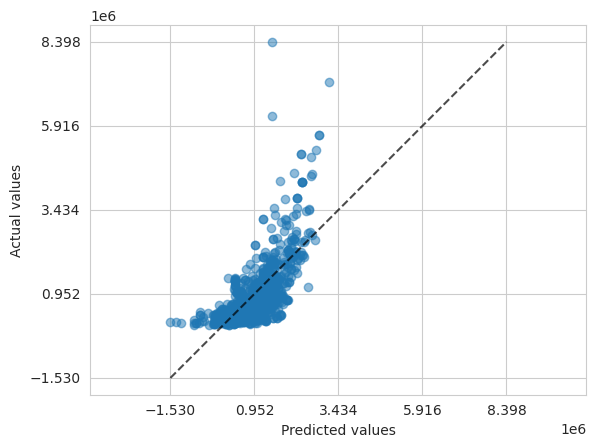

In [251]:
PredictionErrorDisplay.from_predictions(
    y_val,
    model.predict(X_val_prep),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5}
);

Небольшие выводы по модели:

используя только 3 числовых признака можно с достаточно большой погрешностью предсказывать цены

есть проблемы предсказания как низких значений цен, так и высоких

модель выглядит "логично": рост года выпуска и мощности положительно сказывается на цене, рост пробега - отрицательно

**Объединяем Pipeline Предобработки и Модель**

In [221]:
pipe_num = Pipeline([
    ('preprocessors', preprocessors_num),
    ('model', SGDRegressor(random_state = 42))
])

In [222]:
pipe_num['preprocessors']

ColumnTransformer(transformers=[('num_pipe',
                                 Pipeline(steps=[('power',
                                                  PowerTransformer())]),
                                 ['year', 'power', 'mileage'])])

In [223]:
pipe_num['model']

SGDRegressor(random_state=42)

In [224]:
pipe_num.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power',
                                                   'mileage'])])),
                ('model', SGDRegressor(random_state=42))])

In [225]:
B0, B = get_coefs(pipe_num['model'])
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
977813.143+373889.29*year+467082.60*power-199393.95*mileage


In [226]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.4219
r2 на валидационной выборке: 0.4289
mse на тренировочной выборке: 624900664627.0447
mse на валидационной выборке: 573860450976.0519
rmse на тренировочной выборке: 790506.5873
rmse на валидационной выборке: 757535.7754


In [227]:
cross_validation (X_train, y_train,
                  pipe_num,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.016524,0.000000,NaN,NaN,NaN,NaN
1,0.085270,0.004799,0.443509,-4.934805e+11,-463153.275981,-5.250570e+06
2,0.008831,0.000000,NaN,NaN,NaN,NaN
3,0.068755,0.004678,0.473725,-5.259022e+11,-464106.338490,-6.757831e+06
4,0.008516,0.000000,NaN,NaN,NaN,NaN




test_R2      4.586169e-01
test_-MSE   -5.096913e+11
test_-MAE   -4.636298e+05
test_-Max   -6.004200e+06
dtype: float64


**Оценим влияние предварительной обработки целевой переменной**

Поправим целевую метку

In [228]:
from sklearn.compose import TransformedTargetRegressor

In [229]:
pipe_num_transform = Pipeline([
    ('preprocessors', preprocessors_num),
    ('name', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

In [230]:
pipe_num_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power',
                                                   'mileage'])])),
                ('name',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [231]:
B0, B = get_coefs(pipe_num_transform['name'].regressor_)
features_names = list(columns_num)

print_model (B0,B,features_names)

Решение
0.014+0.48*year+0.46*power-0.20*mileage


In [232]:
Bs = np.hstack([B0,B])
vis_weigths(Bs,features_names)

In [233]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_num_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_num_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.5147
r2 на валидационной выборке: 0.5217
mse на тренировочной выборке: 524521496966.5080
mse на валидационной выборке: 480638606745.2795
rmse на тренировочной выборке: 724238.5636
rmse на валидационной выборке: 693281.0446


In [234]:
cross_validation (X_train, y_train,
                  pipe_num_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.010799,0.000000,NaN,NaN,NaN,NaN
1,0.099466,0.004843,0.519499,-4.260941e+11,-377995.153521,-5.692567e+06
2,0.008450,0.000000,NaN,NaN,NaN,NaN
3,0.084754,0.004932,0.563565,-4.361260e+11,-376510.189306,-7.226525e+06
4,0.008409,0.000000,NaN,NaN,NaN,NaN




test_R2      5.415322e-01
test_-MSE   -4.311101e+11
test_-MAE   -3.772527e+05
test_-Max   -6.459546e+06
dtype: float64


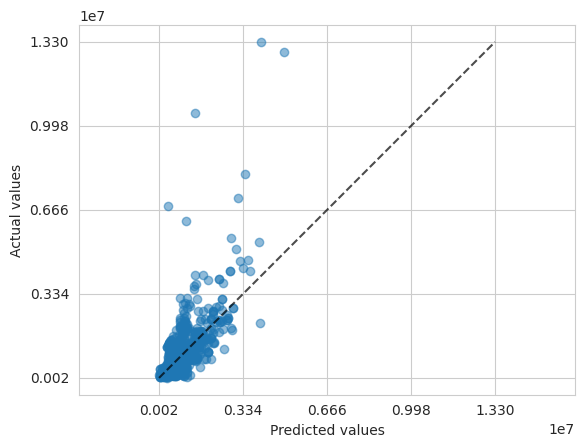

In [235]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_num_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

предварительная обработка целевой переменной улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.51 против 0.42)

в целом предварительная обработка целевой переменной улучшила предсказание низких значений цен (с большими ценами всё ещё проблемы)

модель всё ещё выглядит "логично": рост года выпуска и мощность положительно сказывается на цене, рост пробега - отрицательно, однако нужно помнить что в этом случае связь - не линейная

**Оценим влияние категориальных признаков**

In [236]:
pipe_all_transform = Pipeline([
    ('preprocessors', preprocessors_all),
    ('model', TransformedTargetRegressor( regressor=SGDRegressor(random_state = 42),
    transformer=PowerTransformer())
    )
])

pipe_all_transform.fit(X_train, y_train)

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power', 'mileage']),
                                                 ('cat_style_fuel',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bodyType', 'fuelType']),
                                                 ('cat_brand',
                                                  Pipeline(steps=[('replace_rare',
                                                                   Rare...
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['brand']),
                                                 ('cat_name',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['name'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [237]:
cat_style_fuel_names = pipe_all_transform['preprocessors'].transformers_[1][1]['encoder'].get_feature_names_out(cat_style_fuel)
cat_brand_names =  pipe_all_transform['preprocessors'].transformers_[2][1]['encoder'].get_feature_names_out(cat_brand)
cat_name_names =  pipe_all_transform['preprocessors'].transformers_[3][1]['encoder'].get_feature_names_out(cat_name)

# объединяем названия колонок в один список (важен порядок как в ColumnTransformer)
columns = np.hstack([num_pipe,
                    cat_style_fuel_names,
                    cat_brand_names,
                    cat_name_names])

In [238]:
B0, B = get_coefs(pipe_all_transform['model'].regressor_)
features_names = list(columns)

print_model (B0,B,features_names)

Решение
0.049+0.36*year+0.36*power-0.19*mileage+0.15*bodyType_Джип 3 дв.+0.36*bodyType_Джип 5 дв.-0.14*bodyType_Купе+0.16*bodyType_Лифтбек+0.16*bodyType_Минивэн+0.02*bodyType_Открытый+0.20*bodyType_Пикап-0.37*bodyType_Седан-0.18*bodyType_Универсал-0.26*bodyType_Хэтчбек 3 дв.-0.05*bodyType_Хэтчбек 5 дв.-0.11*fuelType_Бензин+0.20*fuelType_Дизель-0.04*fuelType_Электро+0.07*brand_Audi+0.16*brand_BMW-0.15*brand_Chery-0.17*brand_Chevrolet-0.03*brand_Citroen-0.12*brand_Daewoo+0.14*brand_Daihatsu+0.32*brand_EXEED-0.14*brand_Ford+0.05*brand_Geely-0.15*brand_Great Wall+0.00*brand_Honda+0.23*brand_Hyundai-0.13*brand_Infiniti+0.24*brand_Kia-0.05*brand_Land Rover+0.40*brand_Lexus-0.25*brand_Mazda+0.34*brand_Mercedes-Benz-0.16*brand_Mitsubishi-0.24*brand_Nissan+0.23*brand_OMODA-0.14*brand_Opel-0.14*brand_Other+0.12*brand_Peugeot+0.05*brand_Renault+0.11*brand_Skoda-0.35*brand_SsangYong-0.01*brand_Subaru+0.00*brand_Suzuki+0.08*brand_Toyota+0.34*brand_Volkswagen-0.03*brand_Volvo-0.33*brand_ГАЗ-0.15*bra

Модификация функции для отрисовки весов

In [239]:
def vis_weigths_threshold(weights, feature_names, threshold, width = 1200, height = 600):
    """Отрисовка весов с фильтром.
    Входные переменные:
    ===========
    weights: веса признаков
    features_names: список названий признаков
    threshold: порог "значимости" коэффициентов
    """
    # фильтруем веса коэффициентов
    mask = np.abs(weights) >= threshold
    weights_filtered = weights[mask]
    feature_names_filtered = [name for name, m in zip(feature_names, mask[1:]) if m]

    # Рисуем столбчатую диаграмму
    vis_weigths(weights_filtered,feature_names_filtered, width = width, height = height)

In [240]:
Bs = np.hstack([B0,B])
vis_weigths_threshold(Bs,columns, 0.08, width = 1800)

In [241]:
print(f"r2 на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train):.4f}")
print(f"r2 на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val):.4f}")

print(f"mse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse):.4f}")
print(f"mse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse):.4f}")

print(f"rmse на тренировочной выборке: {calculate_metric(pipe_all_transform, X_train, y_train, mse, squared = False):.4f}")
print(f"rmse на валидационной выборке: {calculate_metric(pipe_all_transform, X_val, y_val, mse, squared = False):.4f}")

r2 на тренировочной выборке: 0.6963
r2 на валидационной выборке: 0.6964
mse на тренировочной выборке: 328255352644.5587
mse на валидационной выборке: 305031619952.7866
rmse на тренировочной выборке: 572935.7317
rmse на валидационной выборке: 552296.6775


In [242]:
cross_validation (X_train, y_train,
                  pipe_all_transform,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.015789,0.000000,NaN,NaN,NaN,NaN
1,0.740013,0.021388,0.740901,-2.297611e+11,-275710.937775,-3.973972e+06
2,0.013646,0.000000,NaN,NaN,NaN,NaN
3,0.806979,0.023368,0.755047,-2.447797e+11,-275749.788296,-5.529762e+06
4,0.015283,0.000000,NaN,NaN,NaN,NaN




test_R2      7.479742e-01
test_-MSE   -2.372704e+11
test_-MAE   -2.757304e+05
test_-Max   -4.751867e+06
dtype: float64


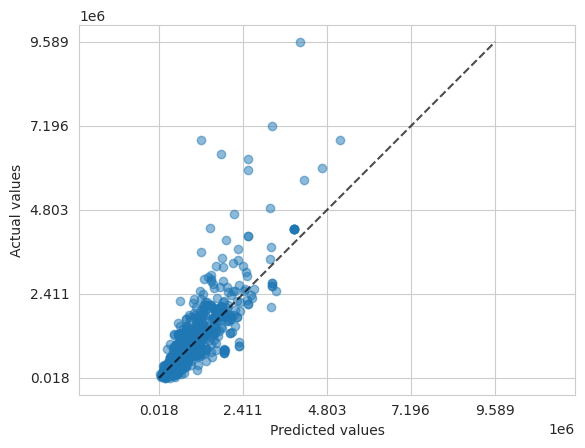

In [243]:
PredictionErrorDisplay.from_predictions(
    y_val,
    pipe_all_transform.predict(X_val),
    kind="actual_vs_predicted",
    scatter_kwargs={"alpha": 0.5},
);

Небольшие выводы по модели:

добавление категориальных признаков улучшает результаты линейной модели (метрика r2 на кроссвалидации 0.69 против 0.51)

предсказание дорогих автомобилей немного улучшилось

**Сохранение модели**

In [244]:
from joblib import dump, load

In [245]:
dump(model, 'model.joblib')  # чтобы сохранить объект
dump(pipe_num, 'pipe_num.joblib')  # чтобы сохранить объект
dump(pipe_num_transform, 'pipe_num_transform.joblib')  # чтобы сохранить объект
dump(pipe_all_transform, 'pipe_all_transform.joblib')  # чтобы сохранить объект

['pipe_all_transform.joblib']

In [246]:
pipe_load = load('pipe_all_transform.joblib')

In [247]:
pipe_load

Pipeline(steps=[('preprocessors',
                 ColumnTransformer(transformers=[('num_pipe',
                                                  Pipeline(steps=[('power',
                                                                   PowerTransformer())]),
                                                  ['year', 'power', 'mileage']),
                                                 ('cat_style_fuel',
                                                  Pipeline(steps=[('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['bodyType', 'fuelType']),
                                                 ('cat_brand',
                                                  Pipeline(steps=[('replace_rare',
                                                                   Rare...
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['brand']),
                                                 ('cat_name',
                                                  Pipeline(steps=[('replace_rare',
                                                                   RareGrouper(threshold=0.0001)),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='if_binary',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['name'])])),
                ('model',
                 TransformedTargetRegressor(regressor=SGDRegressor(random_state=42),
                                            transformer=PowerTransformer()))])

In [248]:
cross_validation (X_train, y_train,
                  pipe_load,
                  scoring_reg,
                  ShuffleSplit(n_splits=5, random_state = 42))

Ошибка на кросс-валидации


,fit_time,score_time,test_R2,test_-MSE,test_-MAE,test_-Max
0,0.010905,0.000000,NaN,NaN,NaN,NaN
1,0.745030,0.023935,0.740901,-2.297611e+11,-275710.937775,-3.973972e+06
2,0.012981,0.000000,NaN,NaN,NaN,NaN
3,0.804036,0.021845,0.755047,-2.447797e+11,-275749.788296,-5.529762e+06
4,0.012973,0.000000,NaN,NaN,NaN,NaN




test_R2      7.479742e-01
test_-MSE   -2.372704e+11
test_-MAE   -2.757304e+05
test_-Max   -4.751867e+06
dtype: float64
